In [10]:
include("/Users/harrisonlabollita/software/AtomDFT/src/AtomDFT.jl")

Main.AtomDFT

In [20]:
using DFTK, Plots, LinearAlgebra

# A _gentle_ introduction to density-functional theory (DFT)

**Harry LaBolllita** 

(Botana group, computational condensed matter physics)

_Grad2Grad_  - August 27, 2021

**references depending on interest**

[Many-body introduction](https://www.springer.com/gp/book/9783642861055), 

[nutshell introduction](https://onlinelibrary.wiley.com/doi/epdf/10.1002/qua.24259)

## the problem...

**Exercise to the reader:** solve the many-body Hamiltonian,

$$ \mathcal{H} = \int d{\bf r} \Psi^{\dagger}({\bf r}) \Big [ -\frac{1}{2} \nabla^{2} + V_{\mathrm{ext}} \, \, ({\bf r}) \Big ] \Psi({\bf r}) + \frac{1}{2} \int d{\bf r}d{\bf r}' \Psi^{\dagger}({\bf r})\Psi^{\dagger}({\bf r}')v_{c}\, ({\bf r} - {\bf r}') \Psi({\bf r}')\Psi({\bf r})$$

**units:** $e^{2} = \hbar = m_{e} = 1$    (energies are in Hartree and lengths are in Bohr radii)

## Why bother?

In principle, we would know everything about the system. 

If our scheme is computationally fast, then we can determine bond lengths, lattice structures, band gaps, effects of dopants, etc.


**Exercise to the reader:** solve the many-body Hamiltonian,

$$ \mathcal{H} = \int d{\bf r} \Psi^{\dagger}({\bf r}) \Big [ -\frac{1}{2} \nabla^{2} + V_{\mathrm{ext}} \, ({\bf r}) \Big ] \Psi({\bf r}) + \frac{1}{2} \int d{\bf r}d{\bf r}' \Psi^{\dagger}({\bf r})\Psi^{\dagger}({\bf r}')v_{c}\, ({\bf r} - {\bf r}') \Psi({\bf r}')\Psi({\bf r})$$

**units:** $e^{2} = \hbar = m_{e} = 1$    (energies are in Hartree and lengths are in Bohr radii)

$$ E = \mathrm{min}_{\Psi} \, \, \langle \Psi | \mathcal{H} | \Psi \rangle $$

## key idea

**Any property of the system of interacting particles can be viewed as __functional__ of the ground state density $n({\bf r})$ !**

$$ \langle \Psi[n] | \hat{\mathcal{O}} | \Psi[n] \rangle = O[n] $$

## the density part...
[Hohenberg and Kohn, PRB 136, B864 (1964)](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B864)

There exists a mapping from the ground state electron density $n({\bf r})$  to a unique external potential:

$$ n({\bf r}) \rightarrow V_{\mathrm{ext}} \, ({\bf r})$$


## the functional part...
Furthermore, [HK](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B864) showed there exists a universal functional of the ground state density

$$ E[n] = F[n] + \int d{\bf r} V_{\mathrm{ext}}\, ({\bf r}) n({\bf r}), $$
where $F[n]$  is the universal functional
$$ F[n] = T[n] + E_{\mathrm{int}} \, [n]$$

[HK](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B864) tell us to do the following)

$$ F[n] = \mathrm{min}_{\Psi\rightarrow n} \, \, \, \, \, \langle \Psi | T[n] + E_{\mathrm{int}}\, \, [n] | \Psi \rangle $$

$$ E = \mathrm{min}_{n} \, \, \Big ( F[n] + \int d{\bf r} V_{\mathrm{ext}}\,({\bf r}) \, \, n({\bf r}) \Big ),$$

[HK](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B864) tell us to do the following

$$ F[n] = \mathrm{min}_{\Psi\rightarrow n} \, \, \, \, \, \langle \Psi | T[n] + E_{\mathrm{int}}\, \, [n] | \Psi \rangle, $$

$$ E = \mathrm{min}_{n} \, \, \Big ( F[n] + \int d{\bf r} V_{\mathrm{ext}}\,({\bf r}) \, \, n({\bf r}) \Big )$$

This only has set the stage we still do not know the form of the $F[n]$ or the mapping from $n({\bf r}) \rightarrow V_{\mathrm{ext}} \, ({\bf r}) $. Given the complexity of the many-body wave function, we are probably going to need an approximation (or many).

## Kohn & Sham save the day...

[Kohn and Sham, PRB 140, A1133 (1965)](https://journals.aps.org/pr/abstract/10.1103/PhysRev.140.A1133)

**The exact ground state density of the interacting system is equal to that of an auxillary non-interacting system!**

## Kohn & Sham save the day...

[Kohn and Sham, PRB 140, A1133 (1965)](https://journals.aps.org/pr/abstract/10.1103/PhysRev.140.A1133)

**The exact ground state density of the interacting system is equal to that of an auxillary non-interacting system**

$$ E_{\mathrm{KS}}\, \, [n] = \sum_{i\sigma} \int d{\bf r}\phi_{i\sigma}^{*}({\bf r})\Big ( -\frac{1}{2} \nabla^{2} \Big ) \phi_{i\sigma}\, ({\bf r}) + \int d{\bf r} V_{\mathrm{ext}}\,({\bf r})n({\bf r}) + E_{\mathrm{H}}\, \,[n] + E_{xc}\, \,[n] $$
where
$$ n({\bf r}) = \sum_{i\sigma \in \mathrm{occ.}} \, \, f_{\mathrm{FD}}\, |\phi_{i\sigma}({\bf r})|^{2},$$
$$ E_{\mathrm{H}}\, \, = \frac{1}{2} \int d{\bf r}d{\bf r}' \frac{n({\bf r})n({\bf r}')}{|{\bf r} - {\bf r}'|} $$
$$ E_{xc} \, \,= \, \, ? $$

## we've seen somthing like this work before...

Weiss mean-field theory for the Ising model does essentially the same thing.

$$ \mathcal{H} = \sum_{\langle ij \rangle } Js_{i}s_{j} - h \sum_{i}s_{i}, $$

$$ \mathcal{H}_{\mathrm{eff}} = -(h + zJm) \, \, s_{o} $$

$$ m = \tanh(\beta ( h + z Jm) )$$



|       | mean-field | density-functional |
|:-----:|:----------:|:------------------:|
|observable | $m$    | $n({\bf r})$       |
| auxiallary system | spin in effecive field | electrons in effective potential |
| Weiss field | local mean field | Kohn-Sham potential |

## XC functional

Local density approximation (LDA),
$$ E_{xc} \, [n] = \int d{\bf r} \, n({\bf r}) \varepsilon_{xc} \, (n({\bf r})), $$
where $\varepsilon_{xc} \, (n({\bf r}))$   is the energy density of a uniform electron gas at the density $n({\bf r})$.

Can be "exactly" parameterized with quantum monte carlo calculations to obtain an analytic form.

## the algorithm

1. guess electron density $n({\bf r})$.
2. calculate the Kohn-Sham potential: $V_{\mathrm{KS}} = V_{\mathrm{ext}} + V_{\mathrm{H}} + V_{xc}$
3. solve Kohn-Sham equations
$$ -\frac{1}{2}\nabla^{2}\phi_{i\sigma}({\bf r}) + V_{\mathrm{KS}} \, \, \phi_{i\sigma}({\bf r}) = \varepsilon_{i}\phi_{i\sigma}$$
4. calculate new density and energy.
5. Some mixing scheme (improves convergence), then continue 1-4 until convergence.

## DFT for an atom

Let's code this up for a single atom and compare to the [NIST database](https://www.nist.gov/pml/atomic-reference-data-electronic-structure-calculations/atomic-reference-data-electronic-7)

In [90]:
r, ρ, pot, Econv = Main.AtomDFT.scf(Z=4, verbose=true);

	Found bound state at E = -0.500000000071673
	Found bound state at E = -0.12498711431249293
	Found bound state at E = -0.049918047596319466
	Found bound state at E = -0.12499460664543632
	Found bound state at E = -0.051611419760514254
	Found bound state at E = -0.053967564424788554
	adding state: 0.0, -0.500000000071673 with fermi=1.0
	adding state: 0.0, -0.12498711431249293 with fermi=1.0
	adding state: 0.0, -0.049918047596319466 with fermi=0.0
	Total charge = 4.0000000000000036 e⁻
1 | Etot[Hartree] = -3.5088422613840984 | ΔE = 7.017684522768197
	Found bound state at E = -6.422507214625822
	Found bound state at E = -0.7931491874720202
	Found bound state at E = -0.1285177993313937
	Found bound state at E = -0.7129672234943609
	Found bound state at E = -0.09998801056223863
	Found bound state at E = -0.04621420163443142
	adding state: 0.0, -6.422507214625822 with fermi=1.0
	adding state: 0.0, -0.7931491874720202 with fermi=1.0
	adding state: 0.0, -0.1285177993313937 with fermi=0.0
	Total

	adding state: 0.0, -3.856135121072467 with fermi=1.0
	adding state: 0.0, -0.20312121552366033 with fermi=1.0
	adding state: 0.0, 0.0036282255092456744 with fermi=0.0
	Total charge = 4.0 e⁻
15 | Etot[Hartree] = -14.449421887403705 | ΔE = 2.7144703704351514e-5
	Found bound state at E = -3.856136426156777
	Found bound state at E = -0.20312157174166443
	Found bound state at E = 0.003628142928078369
	Found bound state at E = -0.07457516268130794
	Found bound state at E = 0.02043144146815485
	Found bound state at E = 0.03371128826688688
	adding state: 0.0, -3.856136426156777 with fermi=1.0
	adding state: 0.0, -0.20312157174166443 with fermi=1.0
	adding state: 0.0, 0.003628142928078369 with fermi=0.0
	Total charge = 4.000000000000008 e⁻
16 | Etot[Hartree] = -14.449426294776172 | ΔE = 8.814744933971497e-6
	Found bound state at E = -3.8561360023580478
	Found bound state at E = -0.20312145606902704
	Found bound state at E = 0.003628169743505839
	Found bound state at E = -0.0745750612048976
	Fou

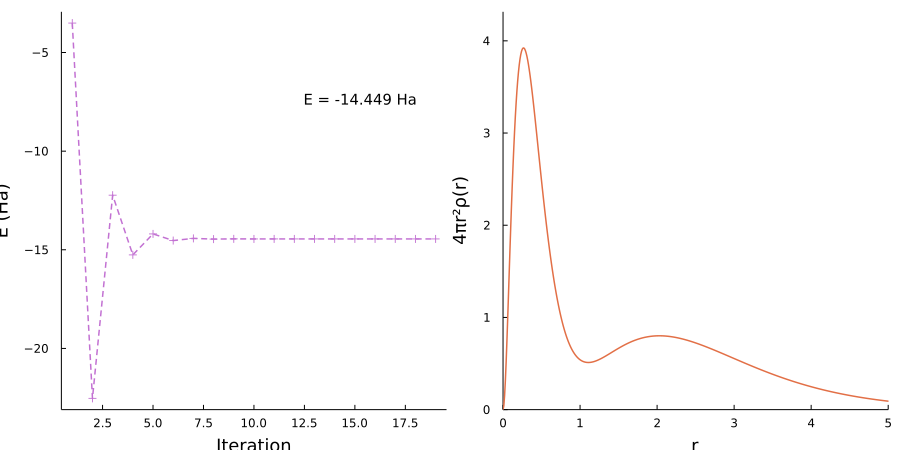

In [91]:
Main.AtomDFT.plot_scf(r, ρ, pot, Econv)

## Density-functional toolkit ([DFTK](https://github.com/JuliaMolSim/DFTK.jl))

 - Commerical codes available ($$)
 - Written in Fortran/C, closed source 100,000 of thousands of lines of code
 - DFTK written in pure Julia (5000 lines of code)
 - Fast enough for easy to medium problems

## Let's do a calculation

Aluminum metal (Al)

face-centered cubic lattice. Electron configuration $[\mathrm{Ne}]3s^{2}3p^{1}$

In [92]:
a = 7.65339
lattice = diagm(fill(a, 3))
terms_LDA = [Kinetic(),           # -1/2 Δ
             AtomicLocal(),       # part of Vₑₓₜ
             AtomicNonlocal(),    # part of Vₑₓₜ
             PspCorrection(),     # part of Vₑₓₜ
             Hartree(),           # Vₕ
             Xc(:lda_xc_teter93), # Vxc
             Ewald()]             # part of Eₙᵤᵪₗₑₐᵣ
#terms_LDA = [Kinetic(), Hartree(), AtomicLocal()]
Al = ElementPsp(:Al, psp=load_psp("hgh/lda/al-q3"))
atoms = [Al => [[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]]]
model = Model(lattice; atoms, temperature=1e-3, terms=terms_LDA)
basis  = PlaneWaveBasis(model; Ecut=15, kgrid=[2, 2, 2])
scfres = self_consistent_field(basis);
scfres.energies

n     Energy            Eₙ-Eₙ₋₁     ρout-ρin   α      Diag
---   ---------------   ---------   --------   ----   ----
  1   -8.355215069899         NaN   1.34e-01   0.80   10.0
  2   -8.356980555949   -1.77e-03   2.57e-02   0.80    1.0
  3   -8.357343793999   -3.63e-04   2.29e-03   0.80    4.0
  4   -8.357342779167    1.01e-06   1.49e-03   0.80    4.0
  5   -8.357345481362   -2.70e-06   2.88e-04   0.80    2.0
  6   -8.357345574755   -9.34e-08   5.87e-05   0.80    2.0


Energy breakdown:
    Kinetic             3.5494341 
    AtomicLocal         1.3990691 
    AtomicNonlocal      1.5589058 
    PspCorrection       -0.8961586
    Hartree             0.0168044 
    Xc                  -3.2022680
    Ewald               -10.7831324

    total               -8.357345574755


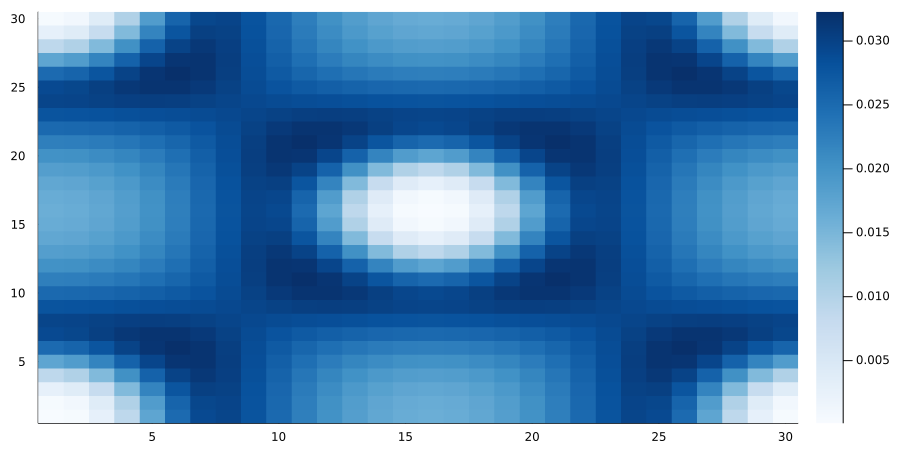

In [83]:
heatmap(scfres.ρ[:, :, 1], c=:Blues)

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:27


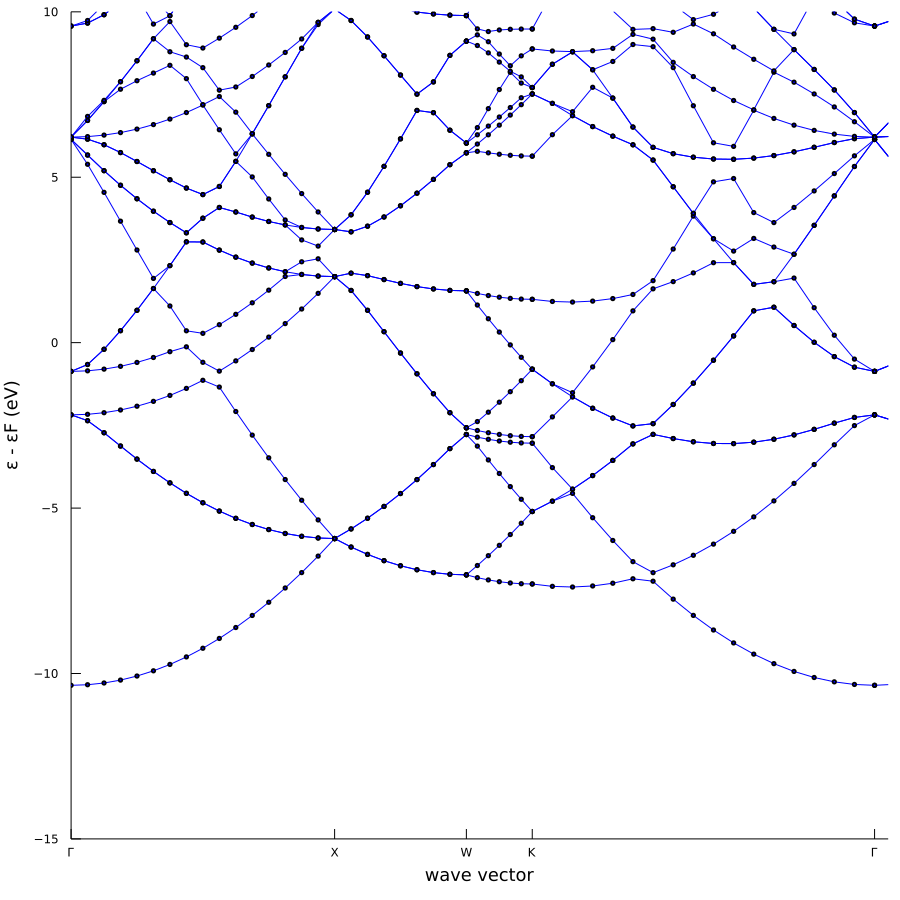

In [77]:
bands = plot_bandstructure(scfres, kline_density=10);
plot!(bands, xlims=(0, 1.8), ylims =(-15, 10), size=(900,900), ylabel="ε - εF (eV)")

In [78]:
a = 10.679
lattice = diagm(fill(a, 3))
Ge = ElementPsp(:Ge, psp=load_psp("hgh/lda/ge-q4"))
atoms = [Ge => [[0.0, 0.0, 0.0], [0.25, 0.25, 0.25]]]
model = model_LDA(lattice, atoms, temperature=1e-3)
basis  = PlaneWaveBasis(model; Ecut=15, kgrid=[2, 2, 2])
scfres = self_consistent_field(basis);

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   α      Diag
---   ---------------   ---------   --------   ----   ----
  1   -7.788373851151         NaN   1.71e-01   0.80    6.0
  2   -7.793070850625   -4.70e-03   3.68e-02   0.80    1.0
  3   -7.793465223638   -3.94e-04   9.30e-03   0.80    2.5
  4   -7.793537825304   -7.26e-05   2.76e-03   0.80    3.0
  5   -7.793544604516   -6.78e-06   2.86e-04   0.80    2.5
  6   -7.793544766439   -1.62e-07   5.14e-05   0.80    3.0


Computing bands along kpath:
       Γ  and  P  and  Z  and  Q  and  Γ  and  F  and  P -> ₁  and  Q -> ₁  and  L  and  Z


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:31


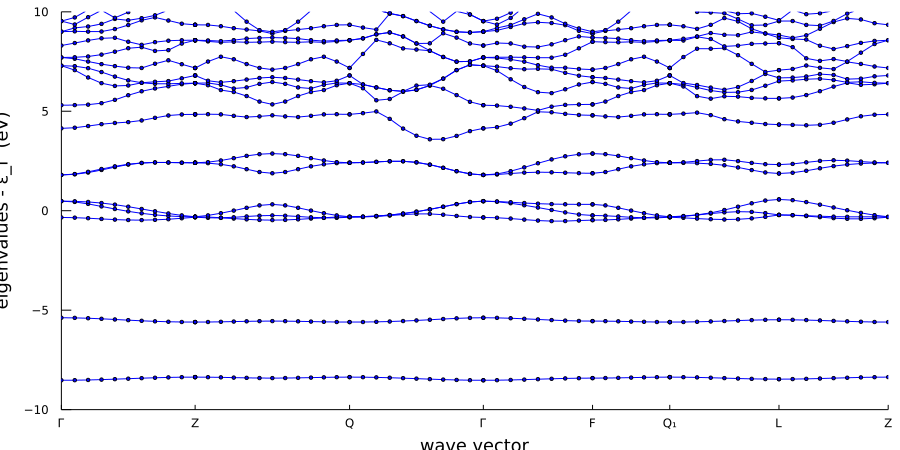

In [79]:
plot_bandstructure(scfres, kline_density=10)

## Breakdown of DFT

Sometimes this auxillary picture breaks down

- band gaps
- strong correlation physics (Mott insulators)

## My current research: DFT + DMFT (beyond DFT methods)

A better way of dealing with correlated physics. Future Grad2Grad talk!